In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
import pandas as pd

In [5]:
file = pd.DataFrame(iris.data, columns = iris.feature_names)

In [6]:
file.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
file['Target'] = iris.target

In [12]:
file.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

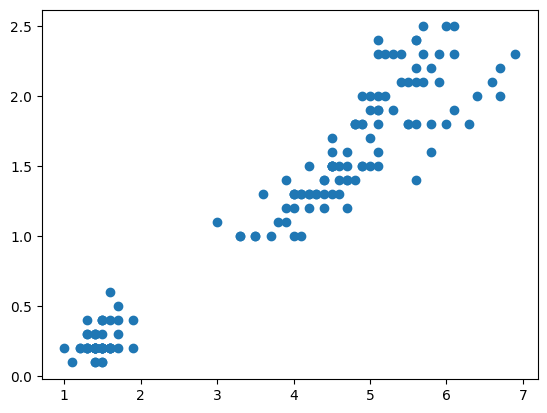

In [15]:
plt.scatter(file['petal length (cm)'], file['petal width (cm)'])

In [16]:
# Here I think that we might get two clusters for the given data set lets perform some operations and then find out

In [17]:
from sklearn.cluster import KMeans

In [18]:
km = KMeans(n_clusters=2)

In [23]:
predicted = km.fit_predict(file[['petal length (cm)', 'petal width (cm)']])

In [24]:
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [25]:
file['Cluster'] = predicted

In [26]:
file.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [27]:
file1 = file[file.Cluster == 0]
file2 = file[file.Cluster == 1]

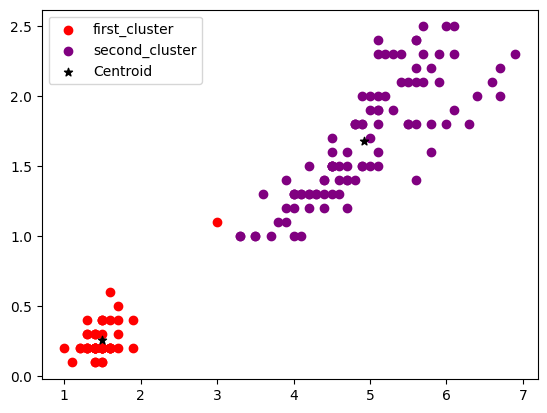

In [29]:
plt.scatter(file1['petal length (cm)'], file1['petal width (cm)'], color = 'red', label = 'first_cluster')
plt.scatter(file2['petal length (cm)'], file2['petal width (cm)'], color = 'purple', label = 'second_cluster')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', color = 'black', label = 'Centroid')
plt.legend()

In [30]:
# It seems that we have got our two clusters app. as we required but there seems a single element which is part of wrong group
# Hence we will try to achieve scaling and again we will perform the kmeans clustering

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [43]:
scaler.fit(file[['petal length (cm)']])

MinMaxScaler()

In [44]:
file['petal Length Scaled'] = scaler.transform(file[['petal length (cm)']])

In [45]:
scaler.fit(file[['petal width (cm)']])

MinMaxScaler()

In [47]:
file['petal width Scaled'] = scaler.transform(file[['petal width (cm)']])
# file.drop('petal length Scaled', axis = 'columns', inplace = True)

In [48]:
file.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Cluster,petal Length Scaled,petal width Scaled
0,5.1,3.5,1.4,0.2,0,0,0.067797,0.041667
1,4.9,3.0,1.4,0.2,0,0,0.067797,0.041667
2,4.7,3.2,1.3,0.2,0,0,0.050847,0.041667
3,4.6,3.1,1.5,0.2,0,0,0.084746,0.041667
4,5.0,3.6,1.4,0.2,0,0,0.067797,0.041667


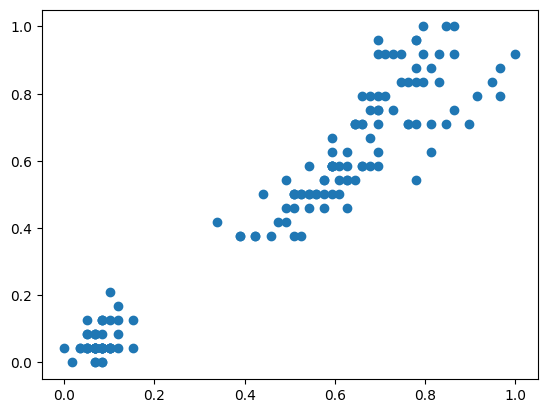

In [49]:
plt.scatter(file['petal Length Scaled'], file['petal width Scaled'])

In [50]:
km = KMeans(n_clusters=2)

In [53]:
predicted = km.fit_predict(file[['petal Length Scaled', 'petal width Scaled']])

In [54]:
predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [55]:
file['Cluster After Scaling'] = predicted

In [56]:
file.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Cluster,petal Length Scaled,petal width Scaled,Cluster After Scaling
0,5.1,3.5,1.4,0.2,0,0,0.067797,0.041667,1
1,4.9,3.0,1.4,0.2,0,0,0.067797,0.041667,1
2,4.7,3.2,1.3,0.2,0,0,0.050847,0.041667,1
3,4.6,3.1,1.5,0.2,0,0,0.084746,0.041667,1
4,5.0,3.6,1.4,0.2,0,0,0.067797,0.041667,1


In [58]:
file1 = file[file['Cluster After Scaling'] == 1]
file2 = file[file['Cluster After Scaling'] == 0]

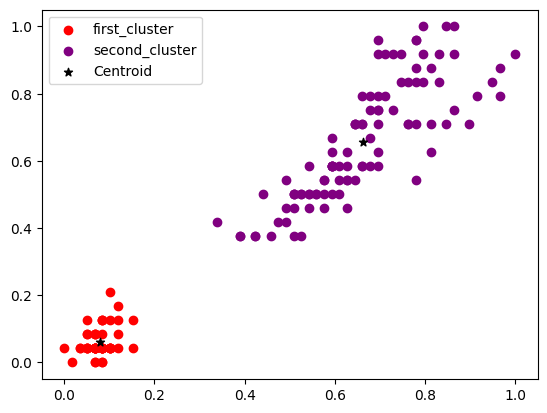

In [61]:
plt.scatter(file1['petal Length Scaled'], file1['petal width Scaled'], color = 'red', label = 'first_cluster')
plt.scatter(file2['petal Length Scaled'], file2['petal width Scaled'], color = 'purple', label = 'second_cluster')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', color = 'black', label = 'Centroid')
plt.legend()

In [62]:
# Look now it is perfectly clustered as we wanted

In [63]:
# Now lets find the elbow point that is if we have divided into right number of clusters or not

In [67]:
sse = []
for i in range(1, 10):
    km = KMeans(n_clusters=i)
    km.fit_predict(file[['petal Length Scaled', 'petal width Scaled']])
    print(km.inertia_)
    sse.append(km.inertia_)

28.368353219727194
5.176463590044368
1.7018746881920963
1.1588792731667124
0.8535683225340072
0.6806539059219306
0.5656776810037091
0.48634024603929904
0.41363725779406146


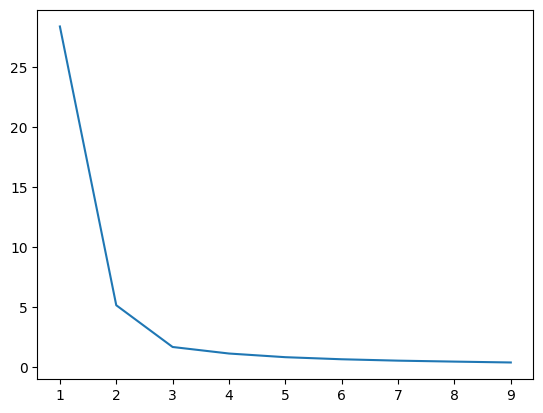

In [70]:
plt.plot(range(1, 10), sse)

In [71]:
# We got elbow at 2 and we have divided it into 2 groups so we are right